# Project name: Understanding the gaming behaviour of adults

Group Mates:
Rubyda Hossain 2012674042;
Saadia Alam 1912552042;
Md. Mudachir Uddin 1921849042;
Rasa Jebin Hossain 1921698642.

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from datetime import datetime, timedelta

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics

## Function to save images as png

In [2]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Importing warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Read dataset

The dataset was manually pre-processed to some degree before starting work. 
For example, 
1. In the question "Approximately how many games do you play on a daily basis?", some participants wrote they play "1/2" games, which got parsed as "1/2/2024", i.e. in a date format. We fixed the format manually and wrote 1.5 (the average of 1 and 2).
And some wrote they play for 3 hrs, or for 1 to 2 hours. We discarded everything other than numbers, and took the average of the numbers.

2. In the question "How much rest do you take during the day? (in hours)", we discarded characters that were not numbers, and if there were multiple numbers, we just took an average, e.g. "30-40 min" was turned to "35 min" which in turn was turned to hour format "0.58 hours".
   
3. In the question "How much rest do you take during the day? (in hours)", we did the same as the previous two cases.

In [4]:
# Read the dataset
data = pd.read_csv('Understanding gaming behavior of adults (aged 18 or above) .csv')
data.head()

Timestamp  \
0   2024/05/14 1:21:35 AM GMT+6   
1   2024/05/14 9:50:16 AM GMT+6   
2  2024/05/14 10:52:46 PM GMT+6   
3  2024/05/14 11:21:26 PM GMT+6   
4  2024/05/14 11:38:06 PM GMT+6   

  Please read the following consent form and select 'Yes' if you agree to all of the following statements. If you do not agree to all the statements, please select 'No' to exit the survey: \n\nTaking Part in the Project\n- I have read and understood the project information sheet dated 05/05/2024 or the project has been fully explained to me. (If you will answer No to this question, please do not proceed with this consent form until you are fully aware of what your participation in the project will mean.)\n- I have been given the opportunity to ask questions about the project.\n- I agree to take part in the project. I understand that taking part in the project will include completing a questionnaire.\n- I understand that by choosing to participate as a volunteer in this research, this does not create a legally binding agreement nor is it intended to create an employment relationship with North South University.\n- I understand that my taking part is voluntary and that I can withdraw from the study at any time; I do not have to give any reasons for why I no longer want to take part and there will be no adverse consequences if I choose to withdraw.\n\nHow my information will be used during and after the project\n- I understand my personal details such as name, phone number, address and email address etc. will not be revealed to people outside the project.\n- I understand and agree that my words may be quoted in publications, reports, web pages, and other research outputs. I understand that I will not be named in these outputs unless I specifically request this.\n- I understand and agree that other authorized researchers will have access to this data only if they agree to preserve the confidentiality of the information as requested in this form.\n- I understand and agree that other authorized researchers may use my data in publications, reports, web pages, and other research outputs, only if they agree to preserve the confidentiality of the information as requested in this form.\n\nSo that the information you provide can be used legally by the researchers\n- By clicking "Yes" and submitting the survey, you indicate that you have read the above information, understand the nature of the study, and consent to participate.  \
0                                                Yes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## EDA and Data Pre-processing

In [5]:
new_column_names = ['Timestamp', 'Consent', 'Age', 'Gender', 'Division', 'Education', 'Occupation', 'Marital_status', 'Play_game', 'Gaming_mode', 'Gaming_frequency', 'Playing_reason', 'Most_played_games', 'Gaming_total_hours', 'Gaming_platform', 'Play_time', 'Total_games_played', 'Competitive_Player', 'Think_about_gaming_during_tasks', 'Okay_with_interruptions', 'Wear_glasses', 'Health_issues', 'Break_hours', 'Resting_hours', 'Play_in_break', 'Play_before_bed', 'Sleep_time', 'Wakeup_time', 'Quality_of_sleep', 'Play_in_morning', 'Nap_frequency', 'Comments']
# Rename the columns
data.columns = new_column_names

# Display the first few rows of the DataFrame to verify the column names
data.head()

Timestamp Consent   Age Gender Division      Education  \
0   2024/05/14 1:21:35 AM GMT+6     Yes  22.0   Male    Dhaka  Undergraduate   
1   2024/05/14 9:50:16 AM GMT+6     Yes  23.0   Male    Dhaka  Undergraduate   
2  2024/05/14 10:52:46 PM GMT+6     Yes  28.0   Male    Dhaka  Undergraduate   
3  2024/05/14 11:21:26 PM GMT+6     Yes  21.0   Male    Dhaka  Undergraduate   
4  2024/05/14 11:38:06 PM GMT+6     Yes  27.0   Male    Dhaka  Undergraduate   

   Occupation Marital_status Play_game     Gaming_mode  ... Break_hours  \
0     Student         Single       Yes          Online  ...         0.0   
1     Student         Single       Yes         Offline  ...         2.0   
2  Job Holder        Married       Yes  Online;Offline  ...         8.0   
3        Both         Single       Yes          Online  ...         8.0   
4     Student         Single       Yes          Online  ...         4.0   

  Resting_hours Play_in_break Play_before_bed Sleep_time Wakeup_time  \
0           0.0           Yes             Yes       5:00       13:00   
1           2.0            No             Yes      22:00        6:00   
2           1.5            No             Yes       0:00        7:00   
3           6.0           Yes             Yes      23:50        6:30   
4           8.0            No             Yes      12:00        8:00   

   Quality_of_sleep Play_in_morning Nap_frequency  \
0              Fair             Yes         Never   
1              Good              No        Rarely   
2              Fair              No        Rarely   
3              Fair             Yes    Once a day   
4              Fair              No        Rarely   

                                       Comments  
0                                     Poor form  
1  Games are good distraction from boring life.  
2                                           NaN  
3                                           NaN  
4                                           NaN  

[5 rows x 32 columns]

In [6]:
print("Number of rows: ", data.shape[0])
print("Number of Columns: ", data.shape[1])

Number of rows:  140
Number of Columns:  32


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        140 non-null    object 
 1   Consent                          140 non-null    object 
 2   Age                              138 non-null    float64
 3   Gender                           138 non-null    object 
 4   Division                         138 non-null    object 
 5   Education                        138 non-null    object 
 6   Occupation                       138 non-null    object 
 7   Marital_status                   138 non-null    object 
 8   Play_game                        138 non-null    object 
 9   Gaming_mode                      115 non-null    object 
 10  Gaming_frequency                 115 non-null    object 
 11  Playing_reason                   115 non-null    object 
 12  Most_played_games     

In [8]:
data.describe()

Age  Total_games_played  Break_hours  Resting_hours
count  138.000000          115.000000   114.000000     113.000000
mean    24.188406            2.208696     4.414912       3.554956
std      4.282967            2.265282     3.295162       3.062477
min     18.000000            0.000000     0.000000       0.000000
25%     22.000000            1.000000     2.000000       1.500000
50%     23.500000            2.000000     3.750000       2.500000
75%     25.750000            2.500000     6.000000       5.500000
max     58.000000           20.000000    18.000000      18.000000

In [9]:
# Apply Pandas Profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='Gaming_behavior_before_preprocessing.html')

Summarize dataset:   3%|█                                        | 1/37 [00:00<00:05,  6.59it/s, Describe variable:Age]D:\PIP Environments\MachineLearning\ML_env\lib\site-packages\ydata_profiling\model\typeset.py:208: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  is_valid_dtype = pdt.is_categorical_dtype(series) and not pdt.is_bool_dtype(
Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 100.02it/s]


In [10]:
# Drop rows where participants did not Consent to participate in the survey
data = data[data['Consent'] != 'No']

# Drop rows where the participants do not play any video games
data = data[data['Play_game'] != 'No']

# Drop the columns Consent, and Play_game
data.drop(['Consent', 'Play_game'], axis='columns', inplace=True)

# Drop the columns Timestamp, Comments, and Most_played_games
data.drop(['Timestamp', 'Comments', 'Most_played_games'], axis='columns', inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 139
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              115 non-null    float64
 1   Gender                           115 non-null    object 
 2   Division                         115 non-null    object 
 3   Education                        115 non-null    object 
 4   Occupation                       115 non-null    object 
 5   Marital_status                   115 non-null    object 
 6   Gaming_mode                      115 non-null    object 
 7   Gaming_frequency                 115 non-null    object 
 8   Playing_reason                   115 non-null    object 
 9   Gaming_total_hours               115 non-null    object 
 10  Gaming_platform                  115 non-null    object 
 11  Play_time                        115 non-null    object 
 12  Total_games_played         

In [12]:
#Fill null values in Break_hours, and Resting_hours with the median values
data['Break_hours']=data['Break_hours'].fillna(data['Break_hours'].median()) 
data['Resting_hours']=data['Resting_hours'].fillna(data['Resting_hours'].median()) 

In [13]:
# Function to generate y_true
def generate_ytrue(row):
    Gaming_frequency = row['Gaming_frequency']
    Gaming_total_hours = row['Gaming_total_hours']

    if Gaming_frequency=='Rarely' or Gaming_frequency=='Once a week':
        return 0
        
    elif Gaming_frequency=='Several times a week':
        if Gaming_total_hours=='4 to 5 hours' or Gaming_total_hours=='5 to 6 hours' or Gaming_total_hours=='6 to 7 hours' or Gaming_total_hours=='More than 7 hours':
            return 1
        else:
            return 0
            
    elif Gaming_frequency=='Daily':
        if Gaming_total_hours=='3 to 4 hours' or Gaming_total_hours=='4 to 5 hours' or Gaming_total_hours=='5 to 6 hours' or Gaming_total_hours=='6 to 7 hours' or Gaming_total_hours=='More than 7 hours':
            return 1
        else:
            return 0
            
# Apply the function to each row, and Create a new column 'Gaming_pattern_Concerning'
data['Gaming_pattern_Concerning'] = data.apply(generate_ytrue, axis=1)

In [14]:
data

Age  Gender Division      Education  Occupation Marital_status  \
0    22.0    Male    Dhaka  Undergraduate     Student         Single   
1    23.0    Male    Dhaka  Undergraduate     Student         Single   
2    28.0    Male    Dhaka  Undergraduate  Job Holder        Married   
3    21.0    Male    Dhaka  Undergraduate        Both         Single   
4    27.0    Male    Dhaka  Undergraduate     Student         Single   
..    ...     ...      ...            ...         ...            ...   
134  23.0  Female  Rangpur  Undergraduate     Student         Single   
135  20.0    Male    Dhaka  Undergraduate        Both         Single   
136  24.0  Female    Dhaka          Other     Student         Single   
138  20.0    Male    Dhaka  Undergraduate     Student         Single   
139  23.0    Male    Dhaka  Undergraduate     Student         Single   

        Gaming_mode      Gaming_frequency  \
0            Online                 Daily   
1           Offline  Several times a week   
2    Online;Offline                 Daily   
3            Online                 Daily   
4            Online           Once a week   
..              ...                   ...   
134  Online;Offline  Several times a week   
135         Offline  Several times a week   
136          Online  Several times a week   
138          Online                 Daily   
139          Online  Several times a week   

                                        Playing_reason Gaming_total_hours  \
0    To feel the thrill of competition/Competency/M...  More than 7 hours   
1    Enjoyment/Refreshment;To feel the thrill of co...       2 to 3 hours   
2    Enjoyment/Refreshment;To cope up with stress/n...       2 to 3 hours   
3    Enjoyment/Refreshment;To cope up with stress/n...       4 to 5 hours   
4                                Enjoyment/Refreshment       3 to 4 hours   
..                                                 ...                ...   
134  Enjoyment/Refreshment;To cope up with stress/n...       1 to 2 hours   
135                              Enjoyment/Refreshment       1 to 2 hours   
136  Enjoyment/Refreshment;To feel the thrill of co...       1 to 2 hours   
138  To feel the thrill of competition/Competency/M...       2 to 3 hours   
139                              Enjoyment/Refreshment       1 to 2 hours   

     ... Break_hours Resting_hours  Play_in_break Play_before_bed Sleep_time  \
0    ...         0.0           0.0            Yes             Yes       5:00   
1    ...         2.0           2.0             No             Yes      22:00   
2    ...         8.0           1.5             No             Yes       0:00   
3    ...         8.0           6.0            Yes             Yes      23:50   
4    ...         4.0           8.0             No             Yes      12:00   
..   ...         ...           ...            ...             ...        ...   
134  ...         2.0           8.0            Yes             Yes       3:00   
135  ...         7.0           3.0            Yes              No      12:00   
136  ...         3.0           2.0            Yes             Yes       2:00   
138  ...        18.0          18.0            Yes             Yes      23:00   
139  ...         2.0           6.0            Yes             Yes       1:30   

    Wakeup_time Quality_of_sleep Play_in_morning         Nap_frequency  \
0         13:00             Fair             Yes                 Never   
1          6:00             Good              No                Rarely   
2          7:00             Fair              No                Rarely   
3          6:30             Fair             Yes            Once a day   
4          8:00             Fair              No                Rarely   
..          ...              ...             ...                   ...   
134        9:00        Very Poor              No            Once a day   
135        7:15             Good              No                Rarely   
136        9:00        Very Poor              No

In [15]:
data['Sleep_time'] = pd.to_datetime(data['Sleep_time'], format='mixed')
data['Wakeup_time'] = pd.to_datetime(data['Wakeup_time'], format='mixed')

# Function to calculate total sleeping time for each row
def calculate_sleep_hours(row):
    sleep_time = row['Sleep_time']
    wakeup_time = row['Wakeup_time']

    # If wakeup time is earlier in the day than sleep time, add a day to wakeup time
    if wakeup_time < sleep_time:
        wakeup_time += timedelta(days=1)

    difference = wakeup_time - sleep_time
    total_sleep_hours = difference.total_seconds() / (60 * 60)
    return total_sleep_hours

# Apply the function to each row, and Create a new column Total_sleep_hours
data['Total_sleep_hours'] = data.apply(calculate_sleep_hours, axis=1)

# Drop the columns Sleep_time, and Wakeup_time
data.drop(['Sleep_time', 'Wakeup_time'], axis=1, inplace=True)

In [16]:
#Extracting numerical column 'No_of_reasons_to_play' out of 'Playing_reason' (By counting the number of reasons the participants play)
#Example of Playing_reason column values: "Enjoyment/Refreshment;To cope up with stress/negative emotions;To feel the thrill of competition/Competency/Mastery;Level-up/Rank Progress"

data['No_of_reasons_to_play'] = data['Playing_reason'].str.count('\;')+1

#Dropping unnecessary categorical column
data.drop(['Playing_reason'], axis=1, inplace=True)

In [17]:
# Create column to calculate at how many hours of the day they play, for example, if someone plays in the "Morning; Noon; Afternoon; Evening; and Night", the count is 5
data['Count_of_play_time'] = data['Play_time'].str.count('\;')+1

#Dropping categorical column Play_time
data.drop(['Play_time'], axis=1, inplace=True)

In [18]:
#Creating a numerical column to keep Count of the number of health issues that the participant has
data['No_of_Health_issues']=np.where(data['Health_issues']=='None of the above',0,data['Health_issues'].str.count('\;')+1)

#Dropping unnecessary categorical column
data.drop(['Health_issues'], axis=1, inplace=True)

In [19]:
#Creating separate columns for online and offline gaming modes
data['Plays_online']=np.where(data['Gaming_mode'].str.contains('Online'),1,0)
data['Plays_offline']=np.where(data['Gaming_mode'].str.contains('Offline'),1,0)

#Dropping unnecessary categorical column
data.drop(['Gaming_mode'], axis=1, inplace=True)

In [20]:
#creating separate columns for PC, Console, and Mobile platform playing
data['Plays_on_PC']=np.where(data['Gaming_platform'].str.contains('PC'),1,0)
data['Plays_on_Console']=np.where(data['Gaming_platform'].str.contains('Console'),1,0)
data['Plays_on_Mobile']=np.where(data['Gaming_platform'].str.contains('Mobile'),1,0)

#Dropping unnecessary categorical column
data.drop(['Gaming_platform'], axis=1, inplace=True)

In [21]:
#creating separate columns for students, and job holders
data['Is_Student']=np.where((np.logical_or(data['Occupation'].str.contains('Student'),data['Occupation'].str.contains('Both'))),1,0)
data['Is_Job_Holder']=np.where((np.logical_or(data['Occupation'].str.contains('Job Holder'),data['Occupation'].str.contains('Both'))),1,0)

#Dropping unnecessary categorical column Occupation
data.drop(['Occupation'], axis=1, inplace=True)

In [22]:
data

Age  Gender Division      Education Marital_status  \
0    22.0    Male    Dhaka  Undergraduate         Single   
1    23.0    Male    Dhaka  Undergraduate         Single   
2    28.0    Male    Dhaka  Undergraduate        Married   
3    21.0    Male    Dhaka  Undergraduate         Single   
4    27.0    Male    Dhaka  Undergraduate         Single   
..    ...     ...      ...            ...            ...   
134  23.0  Female  Rangpur  Undergraduate         Single   
135  20.0    Male    Dhaka  Undergraduate         Single   
136  24.0  Female    Dhaka          Other         Single   
138  20.0    Male    Dhaka  Undergraduate         Single   
139  23.0    Male    Dhaka  Undergraduate         Single   

         Gaming_frequency Gaming_total_hours  Total_games_played  \
0                   Daily  More than 7 hours                 4.5   
1    Several times a week       2 to 3 hours                 3.0   
2                   Daily       2 to 3 hours                 2.5   
3                   Daily       4 to 5 hours                 2.0   
4             Once a week       3 to 4 hours                 1.0   
..                    ...                ...                 ...   
134  Several times a week       1 to 2 hours                 1.0   
135  Several times a week       1 to 2 hours                 1.0   
136  Several times a week       1 to 2 hours                 2.0   
138                 Daily       2 to 3 hours                 1.0   
139  Several times a week       1 to 2 hours                 1.0   

    Competitive_Player Think_about_gaming_during_tasks  ...  \
0                  Yes                             Yes  ...   
1                   No                              No  ...   
2                  Yes                             Yes  ...   
3                  Yes                              No  ...   
4                   No                              No  ...   
..                 ...                             ...  ...   
134                Yes                              No  ...   
135                 No                              No  ...   
136                Yes                             Yes  ...   
138                Yes                             Yes  ...   
139                Yes                             Yes  ...   

    No_of_reasons_to_play Count_of_play_time  No_of_Health_issues  \
0                       1                  5                    0   
1                       3                  2                    5   
2                       4                  2                    1   
3                       3                  1                    0   
4                       1                  1                    0   
..                    ...                ...                  ...   
134                     3                  1                    3   
135                     1                  3                    2   
136                     2                  1                    2   
138                     2                  5                    4   
139                     1                  1                    0   

     Plays_online Plays_offline Plays_on_PC Plays_on_Console Plays_on_Mobile  \
0               1             0           1                0               1   
1               0             1           1                0               1   
2               1             1           1                0               1   
3               1             0           1                0               0   
4               1             0           1                0               0   
..            ...           ...         ...              ...             ...   
134             1             1           1                0               1   
135             0             1           0                0               1   
136             1             0           0                0               1   
138             1             0           0                0               1   
13

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 139
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              115 non-null    float64
 1   Gender                           115 non-null    object 
 2   Division                         115 non-null    object 
 3   Education                        115 non-null    object 
 4   Marital_status                   115 non-null    object 
 5   Gaming_frequency                 115 non-null    object 
 6   Gaming_total_hours               115 non-null    object 
 7   Total_games_played               115 non-null    float64
 8   Competitive_Player               115 non-null    object 
 9   Think_about_gaming_during_tasks  115 non-null    object 
 10  Okay_with_interruptions          115 non-null    object 
 11  Wear_glasses                     115 non-null    object 
 12  Break_hours                

In [24]:
#Using label encoder for columns that only have 'Yes' and 'No' values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Competitive_Player"] = encoder.fit_transform(data["Competitive_Player"])
data["Think_about_gaming_during_tasks"] = encoder.fit_transform(data["Think_about_gaming_during_tasks"])
data["Okay_with_interruptions"] = encoder.fit_transform(data["Okay_with_interruptions"])
data["Wear_glasses"] = encoder.fit_transform(data["Wear_glasses"])
data["Play_in_break"] = encoder.fit_transform(data["Play_in_break"])
data["Play_before_bed"] = encoder.fit_transform(data["Play_before_bed"])
data["Play_in_morning"] = encoder.fit_transform(data["Play_in_morning"])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 139
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              115 non-null    float64
 1   Gender                           115 non-null    object 
 2   Division                         115 non-null    object 
 3   Education                        115 non-null    object 
 4   Marital_status                   115 non-null    object 
 5   Gaming_frequency                 115 non-null    object 
 6   Gaming_total_hours               115 non-null    object 
 7   Total_games_played               115 non-null    float64
 8   Competitive_Player               115 non-null    int32  
 9   Think_about_gaming_during_tasks  115 non-null    int32  
 10  Okay_with_interruptions          115 non-null    int32  
 11  Wear_glasses                     115 non-null    int32  
 12  Break_hours                

In [26]:
# Ordinal encoding using sklearn

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder_1 = OrdinalEncoder(categories=[['Rarely', 'Once a week', 'Several times a week', 'Daily']])

data['Gaming_frequency'] = ordinal_encoder_1.fit_transform(data[['Gaming_frequency']])

data['Gaming_frequency'] = data['Gaming_frequency'].astype(int)



ordinal_encoder_2 = OrdinalEncoder(categories=[['Less than 1 hour', '1 to 2 hours', '2 to 3 hours', '3 to 4 hours', '4 to 5 hours', '5 to 6 hours', '6 to 7 hours', 'More than 7 hours']])

data['Gaming_total_hours'] = ordinal_encoder_2.fit_transform(data[['Gaming_total_hours']])

data['Gaming_total_hours'] = data['Gaming_total_hours'].astype(int)




ordinal_encoder_3 = OrdinalEncoder(categories=[['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']])

data['Quality_of_sleep'] = ordinal_encoder_3.fit_transform(data[['Quality_of_sleep']])

data['Quality_of_sleep'] = data['Quality_of_sleep'].astype(int)



ordinal_encoder_4 = OrdinalEncoder(categories=[['Never', 'Rarely', 'Once a day', 'Multiple times a day']])

data['Nap_frequency'] = ordinal_encoder_4.fit_transform(data[['Nap_frequency']])

data['Nap_frequency'] = data['Nap_frequency'].astype(int)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 139
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              115 non-null    float64
 1   Gender                           115 non-null    object 
 2   Division                         115 non-null    object 
 3   Education                        115 non-null    object 
 4   Marital_status                   115 non-null    object 
 5   Gaming_frequency                 115 non-null    int32  
 6   Gaming_total_hours               115 non-null    int32  
 7   Total_games_played               115 non-null    float64
 8   Competitive_Player               115 non-null    int32  
 9   Think_about_gaming_during_tasks  115 non-null    int32  
 10  Okay_with_interruptions          115 non-null    int32  
 11  Wear_glasses                     115 non-null    int32  
 12  Break_hours                

In [28]:
#One-Hot Encoding of Categorical Columns 'Gender', 'Division', 'Education', & 'Marital_status' Using Pandas library
final_data = pd.get_dummies(data, columns = ['Gender', 'Division', 'Education', 'Marital_status'])

#Replacing True with 1, and False with 0
final_data = final_data.replace({True: 1, False: 0})

In [29]:
# Print the updated DataFrame
final_data

Age  Gaming_frequency  Gaming_total_hours  Total_games_played  \
0    22.0                 3                   7                 4.5   
1    23.0                 2                   2                 3.0   
2    28.0                 3                   2                 2.5   
3    21.0                 3                   4                 2.0   
4    27.0                 1                   3                 1.0   
..    ...               ...                 ...                 ...   
134  23.0                 2                   1                 1.0   
135  20.0                 2                   1                 1.0   
136  24.0                 2                   1                 2.0   
138  20.0                 3                   2                 1.0   
139  23.0                 2                   1                 1.0   

     Competitive_Player  Think_about_gaming_during_tasks  \
0                     1                                1   
1                     0                                0   
2                     1                                1   
3                     1                                0   
4                     0                                0   
..                  ...                              ...   
134                   1                                0   
135                   0                                0   
136                   1                                1   
138                   1                                1   
139                   1                                1   

     Okay_with_interruptions  Wear_glasses  Break_hours  Resting_hours  ...  \
0                          0             1          0.0            0.0  ...   
1                          1             1          2.0            2.0  ...   
2                          1             1          8.0            1.5  ...   
3                          0             1          8.0            6.0  ...   
4                          0             1          4.0            8.0  ...   
..                       ...           ...          ...            ...  ...   
134                        0             1          2.0            8.0  ...   
135                        1             1          7.0            3.0  ...   
136                        0             1          3.0            2.0  ...   
138                        0             1         18.0           18.0  ...   
139                        0             0          2.0            6.0  ...   

     Division_Rangpur  Division_Sylhet  Education_HSC  Education_Other  \
0                   0                0              0                0   
1                   0                0              0                0   
2                   0                0              0                0   
3                   0                0              0                0   
4                   0                0              0                0   
..                ...              ...            ...              ...   
134                 1                0              0                0   
135                 0                0              0                0   
136                 0                0              0                1   
138                 0                0              0                0   
139                 0                0              0                0   

     Education_Postgraduate  Education_SSC  Education_Undergraduate  \
0                         0              0                        1   
1                         0              0                        1   
2                         0              0                        1   
3                         0              0                        1   
4                         0              0                        1   
..                      ...            ...                      ...   
134                       0              0                        1   
135                       

In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115 entries, 0 to 139
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              115 non-null    float64
 1   Gaming_frequency                 115 non-null    int32  
 2   Gaming_total_hours               115 non-null    int32  
 3   Total_games_played               115 non-null    float64
 4   Competitive_Player               115 non-null    int32  
 5   Think_about_gaming_during_tasks  115 non-null    int32  
 6   Okay_with_interruptions          115 non-null    int32  
 7   Wear_glasses                     115 non-null    int32  
 8   Break_hours                      115 non-null    float64
 9   Resting_hours                    115 non-null    float64
 10  Play_in_break                    115 non-null    int32  
 11  Play_before_bed                  115 non-null    int32  
 12  Quality_of_sleep           

In [31]:
print("In the final dataset")
print("Number of rows: ", final_data.shape[0])
print("Number of Columns: ", final_data.shape[1])

In the final dataset
Number of rows:  115
Number of Columns:  45


In [32]:
#Resetting index of the dataset
final_data=final_data.reset_index(drop=True)

In [33]:
#After all pre-processing writing the dataframe to csv
final_data.to_csv('final_data.csv')

In [34]:
# Apply Pandas Profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(final_data)
prof.to_file(output_file='Gaming_behavior_after_preprocessing.html')

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 348.77it/s]


## Train-Test set splitting

In [35]:
# Separate the Independent and Dependent variables
X = final_data.drop(columns = 'Gaming_pattern_Concerning')
y = final_data['Gaming_pattern_Concerning']

#X.head()
#y.head()

In [36]:
y.value_counts()

Gaming_pattern_Concerning
0    86
1    29
Name: count, dtype: int64

In [37]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify= y, random_state=42)

#y.value_counts()
#y_train.value_counts()
#y_test.value_counts()

In [38]:
'''
X.to_csv('X.csv')
y.to_csv('y.csv')

X_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')

X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')
'''

"\nX.to_csv('X.csv')\ny.to_csv('y.csv')\n\nX_train.to_csv('X_train.csv')\ny_train.to_csv('y_train.csv')\n\nX_test.to_csv('X_test.csv')\ny_test.to_csv('y_test.csv')\n"

In [39]:
#X_train.head()
#X_test.head()

## Feature scaling train and test set with min-max scaler

In [40]:
#Feature Scaling with min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaleVars = ['Age', 'Gaming_frequency', 'Gaming_total_hours', 'Total_games_played', 'Break_hours', 'Resting_hours', 'Quality_of_sleep', 'Nap_frequency', 'Total_sleep_hours', 'No_of_reasons_to_play', 'Count_of_play_time', 'No_of_Health_issues']
mms = MinMaxScaler()
X_train[scaleVars] = mms.fit_transform(X_train[scaleVars])
X_test[scaleVars] = mms.transform(X_test[scaleVars])

## Applying ML algorithms

### An important note, 
For observing model performance:
The more serious mistake is predicting concerning (1) as non-concerning (0).
So, FN is more problematic.
We need higher Recall.

#### Applying a Dummy classifier from scikit-learn to measure the performance of all classifiers

Training time: 0.0

Train Accuracy 0.75
Test Accuracy 0.7391304347826086 

				 Base Classifier


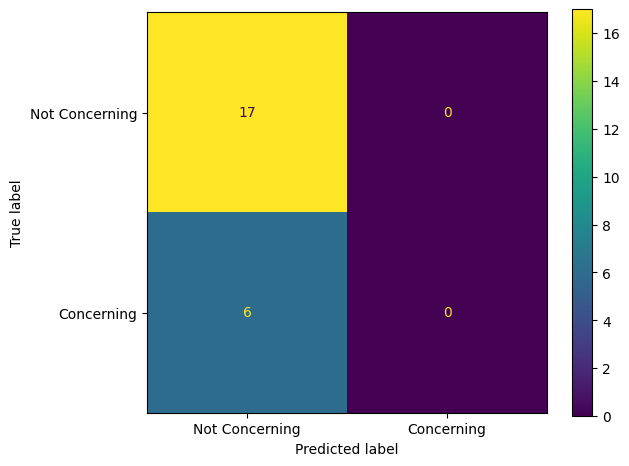

Accuracy  Precision  Recall  F1 Score  ROC AUC
Base Classifier   0.73913        0.0     0.0       0.0      0.5

In [41]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

dummy = DummyClassifier(strategy = "most_frequent")
import time
t0 = time.time()
dummy.fit(X_train, y_train)
print("Training time:", time.time()-t0)
y_pred=dummy.predict(X_test)

train_accuracy=accuracy_score(y_train, dummy.predict(X_train))
test_accuracy=accuracy_score(y_test, y_pred)

print('\nTrain Accuracy', train_accuracy)
print('Test Accuracy', test_accuracy,'\n')

train_test_accuracy = pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy'])
train_test_accuracy.loc['Base Classifier'] = [train_accuracy, test_accuracy]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

results_dummy = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
results_dummy.loc['Base Classifier'] = [accuracy, precision, recall, f1, roc_auc]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\t\t\t\t\033[1m Base Classifier\033[1m')
cm_display.plot()
save_fig('Base Classifier Confusion Matrix')

plt.show()
results_dummy

#### Applying KNN, Decision Tree, Logistic Regression, Support Vector Machine classifier, Random Forest, and Ada Boost

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

def evaluate_classifiers(train_X, train_y, test_X, test_y):
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(random_state=20),
        'Logistic Regression': LogisticRegression(random_state=20),
        'SVC': SVC(random_state = 20),
        'Random Forest': RandomForestClassifier(random_state=20),
        'AdaBoost': AdaBoostClassifier(random_state=20)
    }
    
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    for name, classifier in classifiers.items():
        classifier.fit(train_X, train_y)
        predictions = classifier.predict(test_X)
        
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        roc_auc = roc_auc_score(test_y, predictions)

        train_accuracy=accuracy_score(train_y, classifier.predict(train_X))
        test_accuracy=accuracy_score(test_y, predictions)
        train_test_accuracy.loc[name+" with default parameters"] = [train_accuracy, test_accuracy]
        
        results.loc[name+" with default parameters"] = [accuracy, precision, recall, f1, roc_auc]
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(test_y, predictions), display_labels = ['Not Concerning', 'Concerning'])
        print('\t\t\t\t\033[1m', name,' with default parameters\033[1m')
        cm_display.plot()
        figure_name=name+" with default parameters Confusion Matrix"
        save_fig(figure_name)
        plt.show()
        
    
    return results

				 KNN  with default parameters


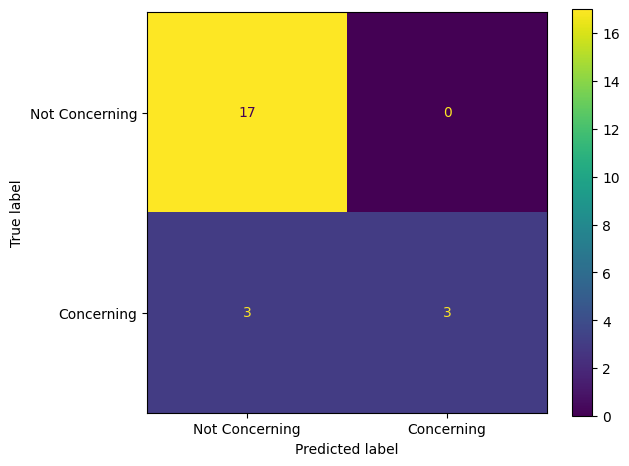

				 Decision Tree  with default parameters


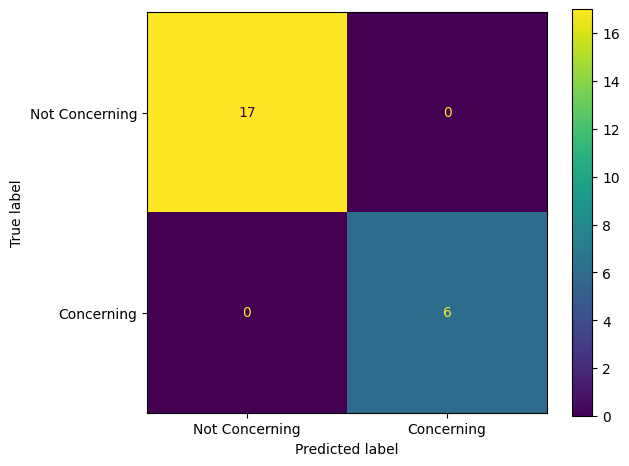

				 Logistic Regression  with default parameters


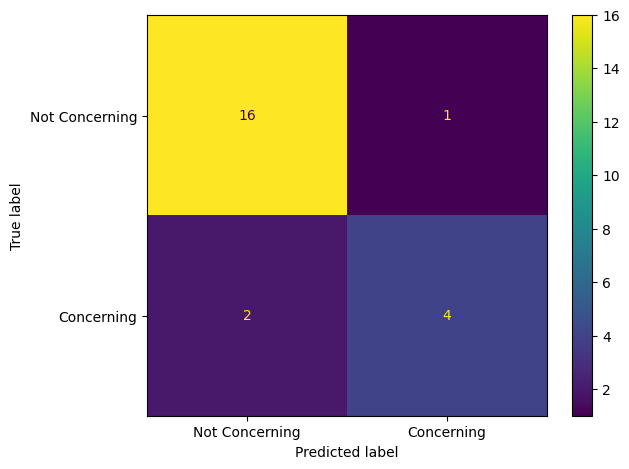

				 SVC  with default parameters


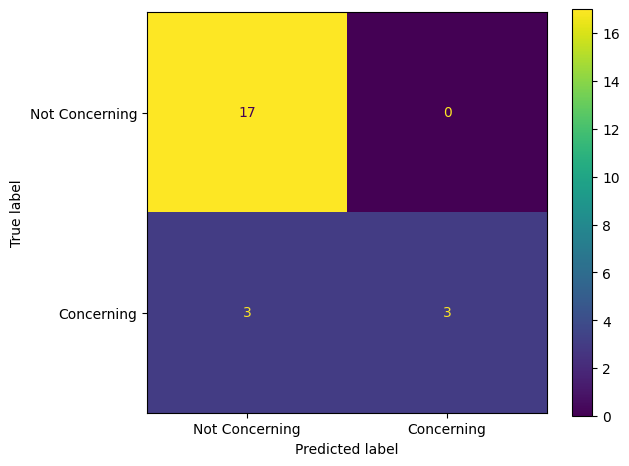

				 Random Forest  with default parameters


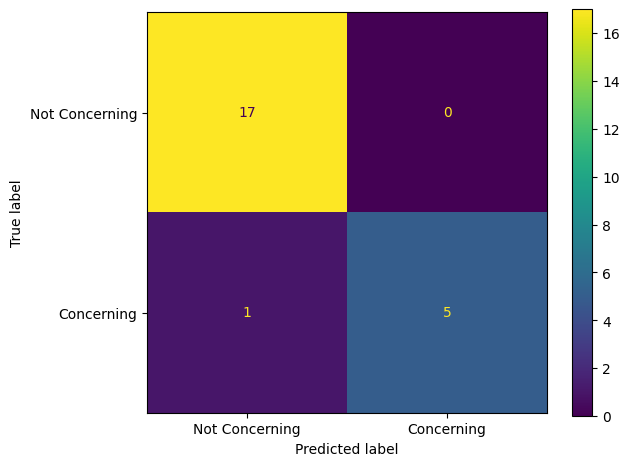

				 AdaBoost  with default parameters


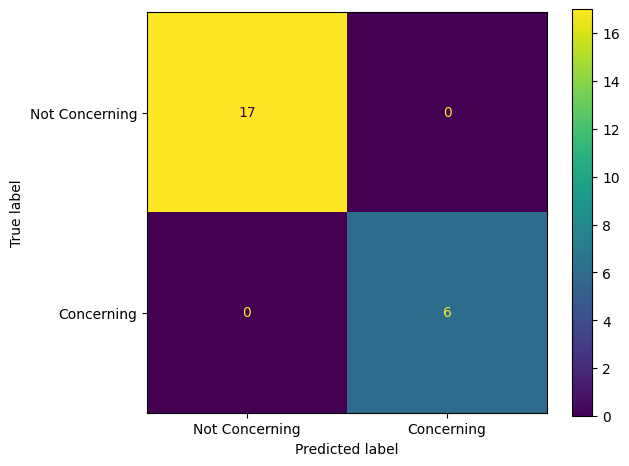

Accuracy  Precision    Recall  \
KNN with default parameters                  0.869565        1.0  0.500000   
Decision Tree with default parameters        1.000000        1.0  1.000000   
Logistic Regression with default parameters  0.869565        0.8  0.666667   
SVC with default parameters                  0.869565        1.0  0.500000   
Random Forest with default parameters        0.956522        1.0  0.833333   
AdaBoost with default parameters             1.000000        1.0  1.000000   

                                             F1 Score   ROC AUC  
KNN with default parameters                  0.666667  0.750000  
Decision Tree with default parameters        1.000000  1.000000  
Logistic Regression with default parameters  0.727273  0.803922  
SVC with default parameters                  0.666667  0.750000  
Random Forest with default parameters        0.909091  0.916667  
AdaBoost with default parameters             1.000000  1.000000

In [43]:
results_df = evaluate_classifiers(X_train, y_train, X_test, y_test)
results_df

###### Observation:
***Decision Tree and AdaBoost classifiers give a recall of 1.0 with the default parameter values***. The default parameter values are:
1. For Decision Tree- criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None.
   
2. For AdaBoost- estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None.

***PERFECT MODEL FOR DEFAULT Decision Tree & AdaBoost Classifiers***.

#### KNN and GridSearch CV to tune hyper-parameters

##### Applying KNN with GridSearcgCV

In [44]:
from sklearn.model_selection import GridSearchCV

#sqrt of 115 samples is 10.7238, K value should be somewhere near this value
n_neighbors= [int(x) for x in np.linspace(start = 1, stop = 15, num = 10)]   
weights=['uniform', 'distance']

param_grid = {
    'n_neighbors': n_neighbors,
    'weights': weights
}

knn =KNeighborsClassifier()

knn_grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
knn_grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 4, 5, 7, 8, 10, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [45]:
knn_grid_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [46]:
best_knn_grid=knn_grid_search.best_estimator_

				 KNN with k=7 and weights=uniform


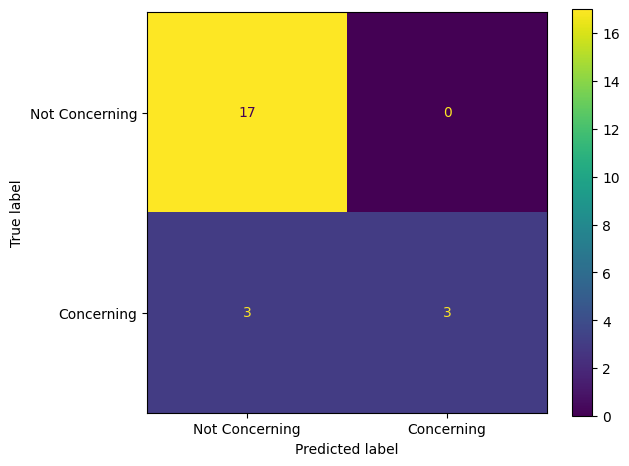

Accuracy  Precision  Recall  F1 Score  \
KNN with k=7 and weights=uniform  0.869565        1.0     0.5  0.666667   

                                  ROC AUC  
KNN with k=7 and weights=uniform     0.75

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
best_knn_grid.fit(X_train, y_train)
y_pred=best_knn_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

train_accuracy=accuracy_score(y_train, best_knn_grid.predict(X_train))
train_test_accuracy.loc['KNN with k=7 and weights=uniform'] = [train_accuracy, accuracy]

results_knn_2 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
results_knn_2.loc['KNN with k=7 and weights=uniform'] = [accuracy, precision, recall, f1, roc_auc]


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\t\t\t\t\033[1m KNN with k=7 and weights=uniform\033[1m')
cm_display.plot()
save_fig('KNN with k=7 and weights=uniform Confusion Matrix')

plt.show()
results_knn_2

###### Observation:
KNN only gives 50% recall. Not a good model.

#### Decision tree and hyper parameter tuning using GridSearch

##### Applying default Decision Tree algorithm with random_state=32

		 Default Decision Tree with criterion=gini, and splitter=best


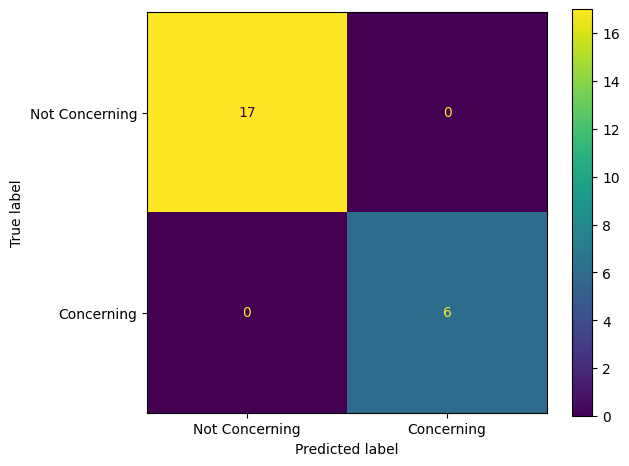

Accuracy  Precision  \
Default Decision Tree with criterion=gini, and ...       1.0        1.0   

                                                    Recall  F1 Score  ROC AUC  
Default Decision Tree with criterion=gini, and ...     1.0       1.0      1.0

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

dtn =DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=32, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
dtn.fit(X_train, y_train)
y_pred = dtn.predict(X_test)

results_dt_1 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
        
results_dt_1.loc['Default Decision Tree with criterion=gini, and splitter=best'] = [accuracy, precision, recall, f1, roc_auc]


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\t\t\033[1m Default Decision Tree with criterion=gini, and splitter=best\033[1m')
cm_display.plot()
save_fig('Default Decision Tree with criterion=gini, and splitter=best Confusion Matrix')

plt.show()
results_dt_1

###### Observation:
***Decision Tree gives the best model with Accuracy, Precision, Recall, and F1-Score at 1.0.***

###### Drawing the DT

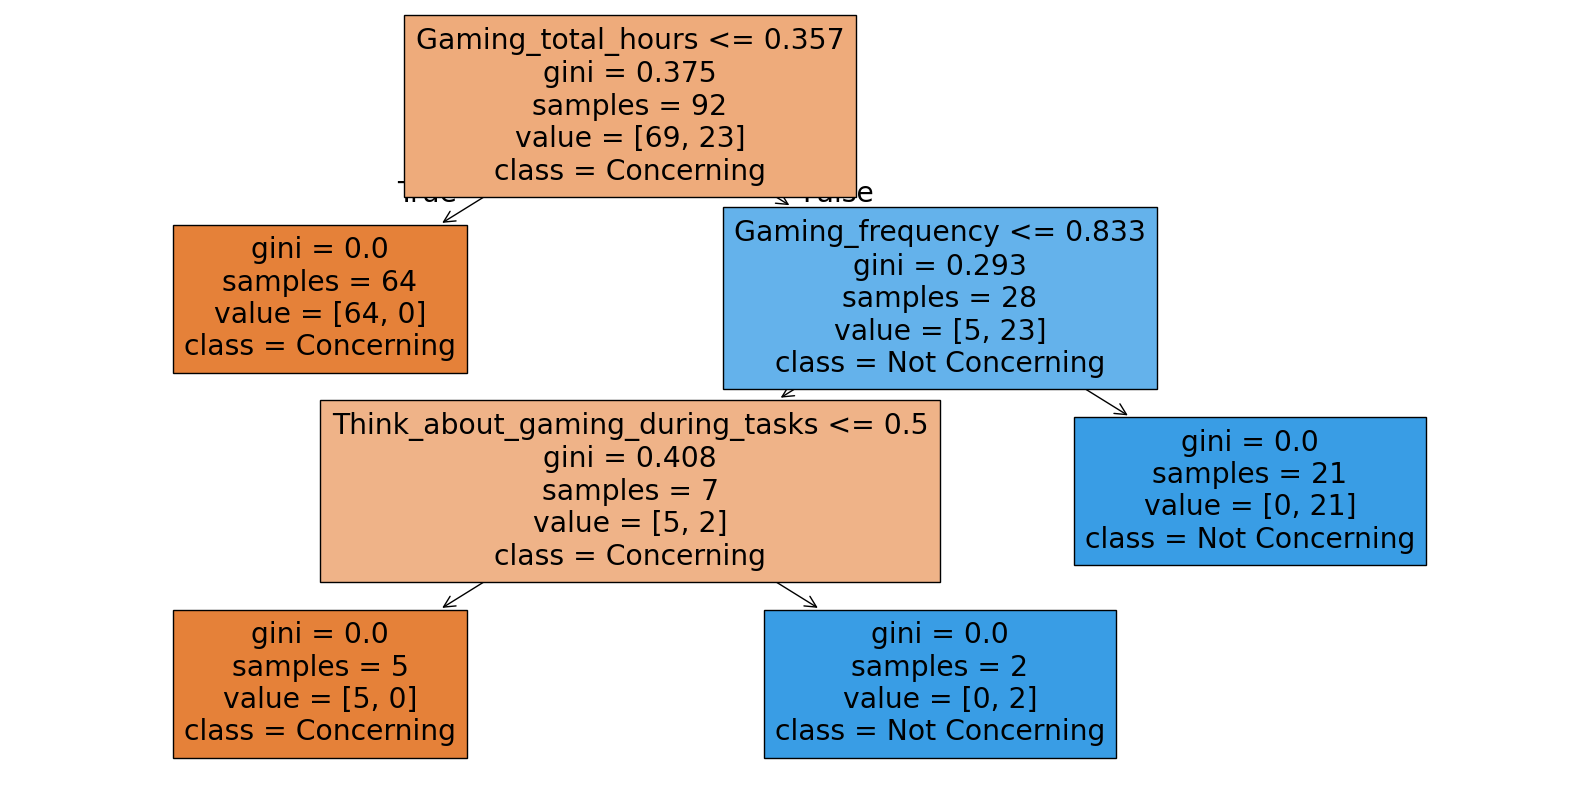

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

def draw_decision_tree(decision_tree, feature_names, class_names):
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()


fn = [str(name) for name in X_train.columns]
y_train_str=y_train.astype('str')
y_train_str[y_train_str=='0']="Not Concerning"
y_train_str[y_train_str=='1']="Concerning"

draw_decision_tree(dtn, feature_names=fn, class_names=y_train_str)


export_graphviz(
        dtn,
        out_file=str(IMAGES_PATH /"default_dt.dot"), 
        feature_names=X_train.columns,
        class_names=['Not Concerning', 'Concerning'],
        rounded=True,
        filled=True
    )
#Go to https://dreampuf.github.io/GraphvizOnline/, to generate the Decision tree images

In [50]:
#from IPython import display
#display.Image(IMAGES_PATH /'default_dt.png')

##### Applying Decision Tree algorithm with different sets of values for the hyper-parameters: criterion, splitter, max_depth, min_samples_split, min_samples_leaf, and max_features

In [51]:
from sklearn.model_selection import GridSearchCV

criterion= ['gini', 'entropy']   
splitter=['best', 'random']
max_depth = [int(x) for x in range(1,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
max_features = ['sqrt', 'log2', 'None']
random_state=[42]

param_grid = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'random_state': random_state
    
}

dt =DecisionTreeClassifier()

dt_grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
dt_grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2160 candidates, totalling 21600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 14],
                         'random_state': [42], 'splitter': ['best', 'random']},
             verbose=2)

In [52]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'random_state': 42,
 'splitter': 'best'}

In [53]:
best_dt_grid=dt_grid_search.best_estimator_

Best DT after shuffling 6 hyper-parameters:
Decision Tree with criterion=entropy, max_depth= 6, max_features=log2, min_samples_leaf= 1, min_samples_split= 10, splitter= best


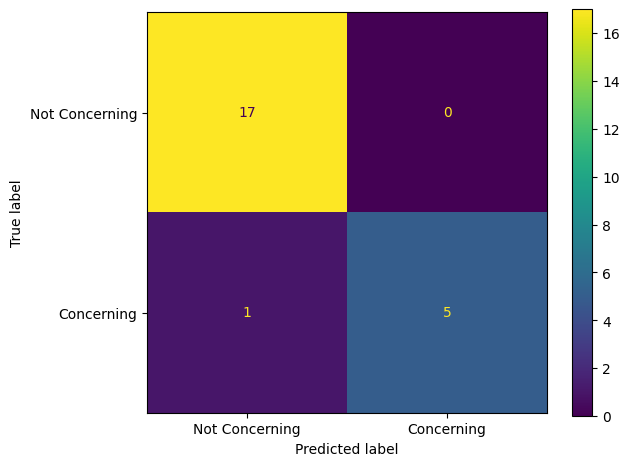

Accuracy  Precision  \
Decision Tree with criterion=entropy, max_depth...  0.956522        1.0   

                                                      Recall  F1 Score  \
Decision Tree with criterion=entropy, max_depth...  0.833333  0.909091   

                                                     ROC AUC  
Decision Tree with criterion=entropy, max_depth...  0.916667

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
best_dt_grid.fit(X_train, y_train)
y_pred=best_dt_grid.predict(X_test)

results_dt_2 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Best DT after shuffling 6 hyper-parameters:")       
results_dt_2.loc['Decision Tree with criterion=entropy, max_depth= 6, max_features=log2, min_samples_leaf= 1, min_samples_split= 10, splitter=best'] = [accuracy, precision, recall, f1, roc_auc]

train_accuracy=accuracy_score(y_train, best_dt_grid.predict(X_train))
train_test_accuracy.loc['Decision Tree with criterion=entropy, max_depth= 6, max_features=log2, min_samples_leaf= 1, min_samples_split= 10, splitter=best'] = [train_accuracy, accuracy]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\033[1mDecision Tree with criterion=entropy, max_depth= 6, max_features=log2, min_samples_leaf= 1, min_samples_split= 10, splitter= best\033[1m')
cm_display.plot()
save_fig('Decision Tree with criterion=entropy, max_depth= 6, max_features=log2, min_samples_leaf= 1, min_samples_split= 10, splitter= best Confusion Matrix')

plt.show()
results_dt_2

###### Observation:
Shuffling with too many hyper-parameters (i.e. criterion, splitter, max_depth, min_samples_split, min_samples_leaf, and max_features) reduced both *accuracy* and *recall*.

###### Drawing the DT

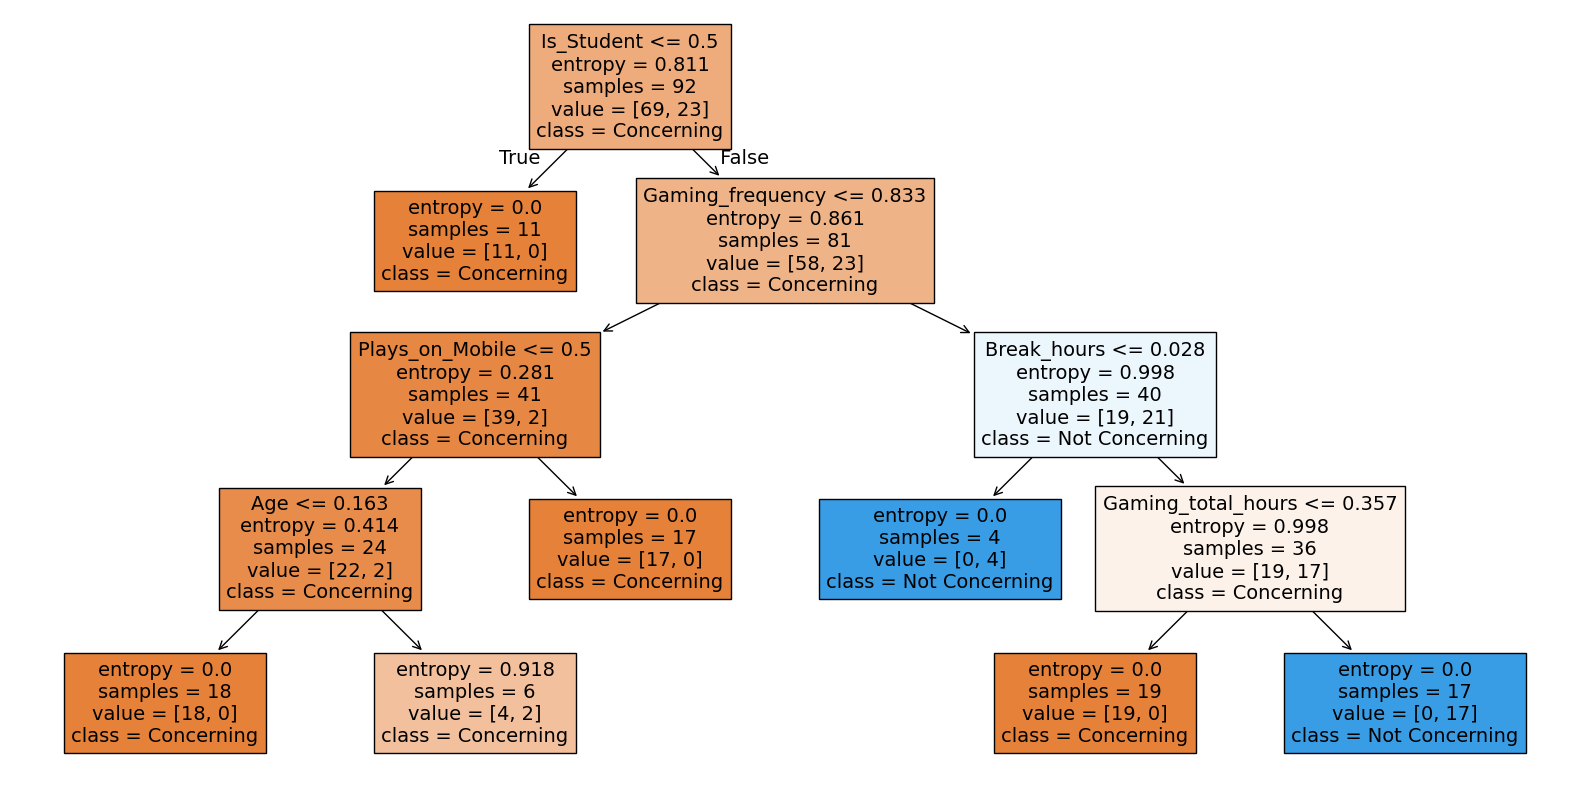

In [55]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def draw_decision_tree(decision_tree, feature_names, class_names):
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()


fn = [str(name) for name in X_train.columns]
y_train_str=y_train.astype('str')
y_train_str[y_train_str=='0']="Not Concerning"
y_train_str[y_train_str=='1']="Concerning"

draw_decision_tree(best_dt_grid, feature_names=fn, class_names=y_train_str)

from sklearn.tree import export_graphviz

export_graphviz(
        best_dt_grid,
        out_file=str(IMAGES_PATH /"best_dt_grid.dot"), 
        feature_names=X_train.columns,
        class_names=['Not Concerning', 'Concerning'],
        rounded=True,
        filled=True
    )
#Go to https://dreampuf.github.io/GraphvizOnline/, to generate the Decision tree images

In [56]:
#from IPython import display
#display.Image(IMAGES_PATH /'best_dt_grid.png')

#### Random Forest and GridSearch CV to tune hyper-parameters

##### Applying Random Forest algorithm with different sets of values for the hyper-parameters: n_estimators, criterion, random_state, min_samples_leaf, and max_features

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


n_estimators= [i for i in range(1,20)]   
criterion= ['gini', 'entropy']
random_state=[23,42,100]
min_samples_leaf=[2,5,10,15]
max_features=['sqrt', 'log2']

param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'random_state':random_state,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features
}

rf =RandomForestClassifier()

rf_grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
rf_grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 912 candidates, totalling 9120 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                         'random_state': [23, 42, 100]},
             verbose=2)

In [58]:
rf_grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'n_estimators': 17,
 'random_state': 23}

In [59]:
best_rf_grid=rf_grid_search.best_estimator_

 Random Forest with criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17


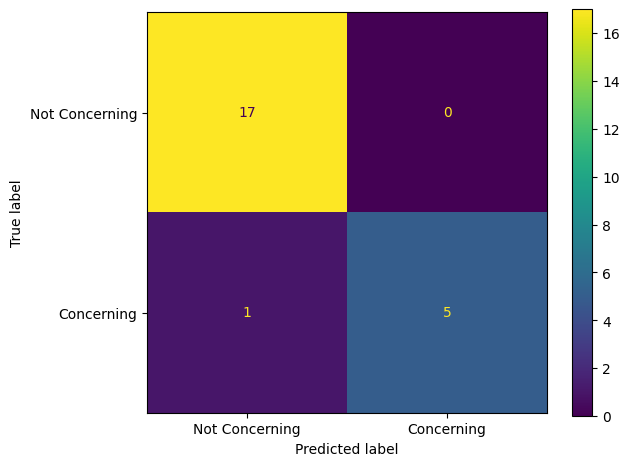

Accuracy  Precision  \
Random Forest with criterion=entropy, max_featu...  0.956522        1.0   

                                                      Recall  F1 Score  \
Random Forest with criterion=entropy, max_featu...  0.833333  0.909091   

                                                     ROC AUC  
Random Forest with criterion=entropy, max_featu...  0.916667

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
best_rf_grid.fit(X_train, y_train)
y_pred=best_rf_grid.predict(X_test)

results_rf_2 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
        
results_rf_2.loc['Random Forest with criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17'] = [accuracy, precision, recall, f1, roc_auc]

train_accuracy=accuracy_score(y_train, best_rf_grid.predict(X_train))
train_test_accuracy.loc['Random Forest with criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17'] = [train_accuracy, accuracy]


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\033[1m Random Forest with criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17\033[1m')
cm_display.plot()
save_fig('Random Forest with criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17 Confusion Matrix')

plt.show()
results_rf_2

###### Observation:
The maximum recall reached is 0.833333. Not the best model

#### AdaBoost and GridSearch CV to tune hyper-parameters

##### Default AdaBoost Classifier

		 Default AdaBoost with n_estimators=50, learning_rate=1, algorithm=SAMME.R


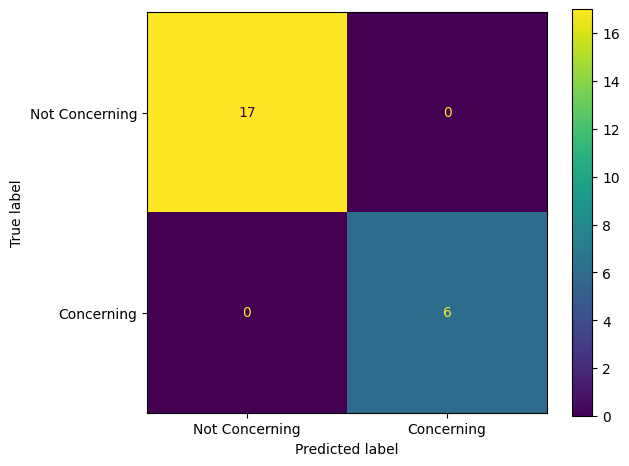

Accuracy  Precision  \
Default AdaBoost with n_estimators=50, learning...       1.0        1.0   

                                                    Recall  F1 Score  ROC AUC  
Default AdaBoost with n_estimators=50, learning...     1.0       1.0      1.0

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=102)
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

results_ada_0 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
        
results_ada_0.loc['Default AdaBoost with n_estimators=50, learning_rate=1, algorithm=SAMME.R'] = [accuracy, precision, recall, f1, roc_auc]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\t\t\033[1m Default AdaBoost with n_estimators=50, learning_rate=1, algorithm=SAMME.R\033[1m')
cm_display.plot()
save_fig('Default AdaBoost with n_estimators=50, learning_rate=1, algorithm=SAMME.R Confusion Matrix')

plt.show()
results_ada_0

##### Applying AdaBoost classifier with different sets of values for the hyper-parameters: estimator, n_estimators, learning_rate, and algorithm (Here taking the best decision tree as estimator)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV


estimator= [dtn]     #taking the best Decision Tree classifier as estimator
n_estimators= [i for i in range(1,5)]
learning_rate=[0,1,5,10]
algorithm=['SAMME', 'SAMME.R']
random_state=[23]


param_grid = {
    'estimator': estimator,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'algorithm': algorithm,
    'random_state': random_state
}

ada =AdaBoostClassifier()

ada_grid_search=GridSearchCV(estimator=ada,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
ada_grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(random_state=32)],
                         'learning_rate': [0, 1, 5, 10],
                         'n_estimators': [1, 2, 3, 4], 'random_state': [23]},
             verbose=2)

In [63]:
ada_grid_search.best_params_

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(random_state=32),
 'learning_rate': 1,
 'n_estimators': 1,
 'random_state': 23}

In [64]:
best_ada_grid=ada_grid_search.best_estimator_

 AdaBoost with algorithm=SAMME, estimator=DecisionTreeClassifier(random_state=100), learning_rate=1, n_estimators=1


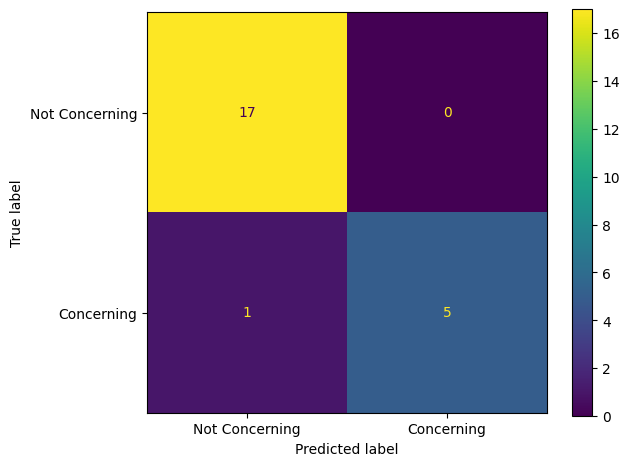

Accuracy  Precision  \
AdaBoost with algorithm=SAMME, estimator=Decisi...  0.956522        1.0   

                                                      Recall  F1 Score  \
AdaBoost with algorithm=SAMME, estimator=Decisi...  0.833333  0.909091   

                                                     ROC AUC  
AdaBoost with algorithm=SAMME, estimator=Decisi...  0.916667

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
best_ada_grid.fit(X_train, y_train)
y_pred=best_ada_grid.predict(X_test)

results_ada = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
        
results_ada.loc['AdaBoost with algorithm=SAMME, estimator=DecisionTreeClassifier(random_state=100), learning_rate=1, n_estimators=1'] = [accuracy, precision, recall, f1, roc_auc]

train_accuracy=accuracy_score(y_train, best_ada_grid.predict(X_train))
train_test_accuracy.loc['AdaBoost with algorithm=SAMME, estimator=DecisionTreeClassifier(random_state=100), learning_rate=1, n_estimators=1'] = [train_accuracy, accuracy]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\033[1m AdaBoost with algorithm=SAMME, estimator=DecisionTreeClassifier(random_state=100), learning_rate=1, n_estimators=1\033[1m')
cm_display.plot()
save_fig('AdaBoost with algorithm=SAMME, estimator=DecisionTreeClassifier(random_state=100), learning_rate=1, n_estimators=1 Confusion Matrix')

plt.show()
results_ada

###### Observation:
The maximum recall reached is 0.833333. Not the best model!

##### Applying AdaBoost classifier with different sets of values for the hyper-parameters: estimator, n_estimators, and learning_rate (Here taking the best decision tree as estimator)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

estimator= [dtn]     #taking the best Decision Tree classifier as base estimator
n_estimators= [i for i in range(1,5)]
learning_rate=[0,1,5,10,15]
random_state=[43]


param_grid = {
    'estimator': estimator,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'random_state': random_state
}

ada =AdaBoostClassifier()

ada_grid_search_2=GridSearchCV(estimator=ada,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
ada_grid_search_2.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'estimator': [DecisionTreeClassifier(random_state=32)],
                         'learning_rate': [0, 1, 5, 10, 15],
                         'n_estimators': [1, 2, 3, 4], 'random_state': [43]},
             verbose=2)

In [67]:
ada_grid_search_2.best_params_

{'estimator': DecisionTreeClassifier(random_state=32),
 'learning_rate': 1,
 'n_estimators': 1,
 'random_state': 43}

In [68]:
best_ada_grid_2=ada_grid_search_2.best_estimator_

 AdaBoost with estimator=DecisionTreeClassifier(random_state=32), learning_rate=1, n_estimators=1


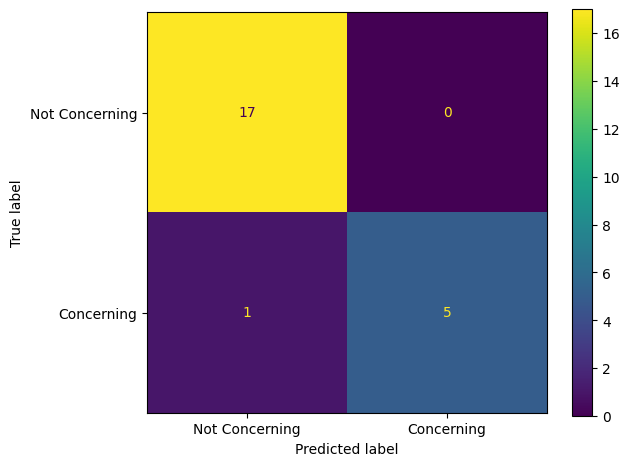

Accuracy  Precision  \
AdaBoost with estimator=DecisionTreeClassifier(...  0.956522        1.0   

                                                      Recall  F1 Score  \
AdaBoost with estimator=DecisionTreeClassifier(...  0.833333  0.909091   

                                                     ROC AUC  
AdaBoost with estimator=DecisionTreeClassifier(...  0.916667

In [69]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
best_ada_grid_2.fit(X_train, y_train)
y_pred=best_ada_grid_2.predict(X_test)

results_ada_2 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
        
results_ada_2.loc['AdaBoost with estimator=DecisionTreeClassifier(random_state=32), learning_rate=1, n_estimators=1'] = [accuracy, precision, recall, f1, roc_auc]

train_accuracy=accuracy_score(y_train, best_ada_grid_2.predict(X_train))
train_test_accuracy.loc['AdaBoost with estimator=DecisionTreeClassifier(random_state=32), learning_rate=1, n_estimators=1'] = [train_accuracy, accuracy]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\033[1m AdaBoost with estimator=DecisionTreeClassifier(random_state=32), learning_rate=1, n_estimators=1\033[1m')
cm_display.plot()
save_fig('AdaBoost with estimator=DecisionTreeClassifier(random_state=32), learning_rate=1, n_estimators=1 Confusion Matrix')

plt.show()
results_ada_2

###### Observation:
The maximum recall reached is 0.833333. Not the best model.

##### Applying AdaBoost classifier with different sets of values for the hyper-parameters: estimator, n_estimators, learning_rate, and algorithm (Taking the best Random Forest as estimator)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

best_random_forest=RandomForestClassifier(criterion='entropy', max_features= 'log2', min_samples_leaf= 2, n_estimators= 17, random_state= 23)

estimator= [best_random_forest]     #taking the best Random forest classifier as base estimator
n_estimators= [i for i in range(1,10)]
learning_rate=[0,1,5,10,15]
algorithm=['SAMME', 'SAMME.R']
random_state=[23]


param_grid = {
    'estimator': estimator,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'algorithm': algorithm,
    'random_state': random_state
}

ada =AdaBoostClassifier()

ada_grid_search_3=GridSearchCV(estimator=ada,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
ada_grid_search_3.fit(X_train,y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [RandomForestClassifier(criterion='entropy',
                                                              max_features='log2',
                                                              min_samples_leaf=2,
                                                              n_estimators=17,
                                                              random_state=23)],
                         'learning_rate': [0, 1, 5, 10, 15],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [23]},
             verbose=2)

In [71]:
ada_grid_search_3.best_params_

{'algorithm': 'SAMME.R',
 'estimator': RandomForestClassifier(criterion='entropy', max_features='log2',
                        min_samples_leaf=2, n_estimators=17, random_state=23),
 'learning_rate': 5,
 'n_estimators': 2,
 'random_state': 23}

In [72]:
best_ada_grid_3=ada_grid_search_3.best_estimator_

AdaBoost with algorithm=SAMME.R, estimator= RandomForestClassifier(criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators= 17), learning_rate= 5, n_estimators=2


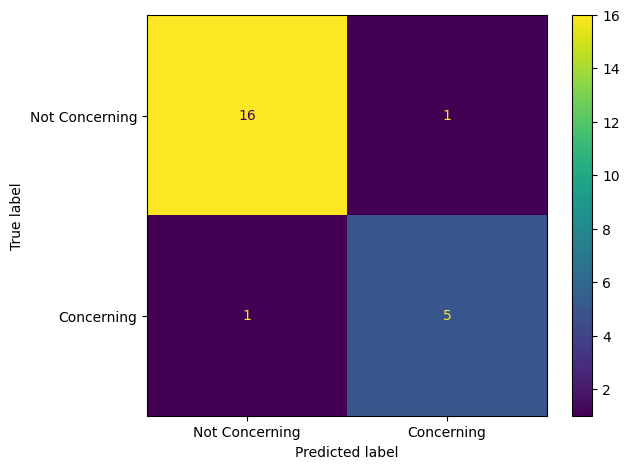

Accuracy  Precision  \
AdaBoost with algorithm=SAMME.R, estimator=Rand...  0.913043   0.833333   

                                                      Recall  F1 Score  \
AdaBoost with algorithm=SAMME.R, estimator=Rand...  0.833333  0.833333   

                                                     ROC AUC  
AdaBoost with algorithm=SAMME.R, estimator=Rand...  0.887255

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
best_ada_grid_3.fit(X_train, y_train)
y_pred=best_ada_grid_3.predict(X_test)

results_ada_3 = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
        
results_ada_3.loc['AdaBoost with algorithm=SAMME.R, estimator=RandomForestClassifier(criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17), learning_rate=5, n_estimators=2'] = [accuracy, precision, recall, f1, roc_auc]

train_accuracy=accuracy_score(y_train, best_ada_grid_3.predict(X_train))
train_test_accuracy.loc['AdaBoost with algorithm=SAMME.R, estimator=RandomForestClassifier(criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17), learning_rate=5, n_estimators=2'] = [train_accuracy, accuracy]

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = ['Not Concerning', 'Concerning'])
print('\033[1mAdaBoost with algorithm=SAMME.R, estimator= RandomForestClassifier(criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators= 17), learning_rate= 5, n_estimators=2\033[1m')
cm_display.plot()
save_fig('AdaBoost with algorithm=SAMME.R, estimator=RandomForestClassifier(criterion=entropy, max_features=log2, min_samples_leaf=2, n_estimators=17), learning_rate=5, n_estimators=2 Confusion Matrix')

plt.show()
results_ada_3

###### Observation:
The maximum recall reached is 0.833333. Not the best model to consider.

## Stacking all results togather

In [74]:
all_results=pd.concat([results_dummy, results_df, results_knn_2, results_dt_2, results_rf_2, results_ada, results_ada_2, results_ada_3], axis=0)

In [75]:
all_results

Accuracy  Precision  \
Base Classifier                                     0.739130   0.000000   
KNN with default parameters                         0.869565   1.000000   
Decision Tree with default parameters               1.000000   1.000000   
Logistic Regression with default parameters         0.869565   0.800000   
SVC with default parameters                         0.869565   1.000000   
Random Forest with default parameters               0.956522   1.000000   
AdaBoost with default parameters                    1.000000   1.000000   
KNN with k=7 and weights=uniform                    0.869565   1.000000   
Decision Tree with criterion=entropy, max_depth...  0.956522   1.000000   
Random Forest with criterion=entropy, max_featu...  0.956522   1.000000   
AdaBoost with algorithm=SAMME, estimator=Decisi...  0.956522   1.000000   
AdaBoost with estimator=DecisionTreeClassifier(...  0.956522   1.000000   
AdaBoost with algorithm=SAMME.R, estimator=Rand...  0.913043   0.833333   

                                                      Recall  F1 Score  \
Base Classifier                                     0.000000  0.000000   
KNN with default parameters                         0.500000  0.666667   
Decision Tree with default parameters               1.000000  1.000000   
Logistic Regression with default parameters         0.666667  0.727273   
SVC with default parameters                         0.500000  0.666667   
Random Forest with default parameters               0.833333  0.909091   
AdaBoost with default parameters                    1.000000  1.000000   
KNN with k=7 and weights=uniform                    0.500000  0.666667   
Decision Tree with criterion=entropy, max_depth...  0.833333  0.909091   
Random Forest with criterion=entropy, max_featu...  0.833333  0.909091   
AdaBoost with algorithm=SAMME, estimator=Decisi...  0.833333  0.909091   
AdaBoost with estimator=DecisionTreeClassifier(...  0.833333  0.909091   
AdaBoost with algorithm=SAMME.R, estimator=Rand...  0.833333  0.833333   

                                                     ROC AUC  
Base Classifier                                     0.500000  
KNN with default parameters                         0.750000  
Decision Tree with default parameters               1.000000  
Logistic Regression with default parameters         0.803922  
SVC with default parameters                         0.750000  
Random Forest with default parameters               0.916667  
AdaBoost with default parameters                    1.000000  
KNN with k=7 and weights=uniform                    0.750000  
Decision Tree with criterion=entropy, max_depth...  0.916667  
Random Forest with criterion=entropy, max_featu...  0.916667  
AdaBoost with algorithm=SAMME, estimator=Decisi...  0.916667  
AdaBoost with estimator=DecisionTreeClassifier(...  0.916667  
AdaBoost with algorithm=SAMME.R, estimator=Rand...  0.887255

## Showing train and test accuracy of the algorithms

In [76]:
train_test_accuracy

Train Accuracy  \
Base Classifier                                           0.750000   
KNN with default parameters                               0.858696   
Decision Tree with default parameters                     1.000000   
Logistic Regression with default parameters               0.934783   
SVC with default parameters                               0.891304   
Random Forest with default parameters                     1.000000   
AdaBoost with default parameters                          1.000000   
KNN with k=7 and weights=uniform                          0.847826   
Decision Tree with criterion=entropy, max_depth...        0.978261   
Random Forest with criterion=entropy, max_featu...        1.000000   
AdaBoost with algorithm=SAMME, estimator=Decisi...        1.000000   
AdaBoost with estimator=DecisionTreeClassifier(...        1.000000   
AdaBoost with algorithm=SAMME.R, estimator=Rand...        1.000000   

                                                    Test Accuracy  
Base Classifier                                          0.739130  
KNN with default parameters                              0.869565  
Decision Tree with default parameters                    1.000000  
Logistic Regression with default parameters              0.869565  
SVC with default parameters                              0.869565  
Random Forest with default parameters                    0.956522  
AdaBoost with default parameters                         1.000000  
KNN with k=7 and weights=uniform                         0.869565  
Decision Tree with criterion=entropy, max_depth...       0.956522  
Random Forest with criterion=entropy, max_featu...       0.956522  
AdaBoost with algorithm=SAMME, estimator=Decisi...       0.956522  
AdaBoost with estimator=DecisionTreeClassifier(...       0.956522  
AdaBoost with algorithm=SAMME.R, estimator=Rand...       0.913043

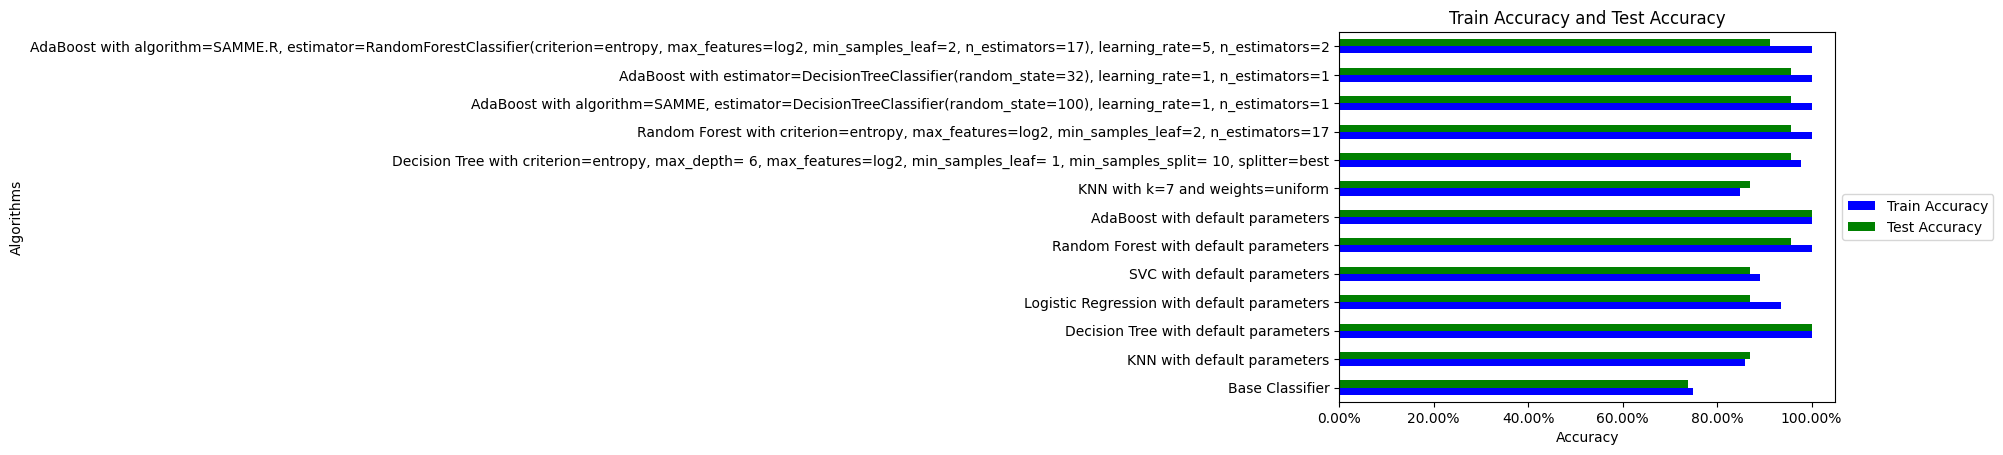

In [77]:
import matplotlib.ticker as mtick

algorithm_names=[i for i in train_test_accuracy.index]
train_accuracy=[i for i in train_test_accuracy['Train Accuracy']]
test_accuracy=[i for i in train_test_accuracy['Test Accuracy']]


accuracy_df=pd.DataFrame({'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}, index= algorithm_names)
ax=accuracy_df.plot.barh(color=['blue','green'])

vals = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(x) for x in vals])


# setting label of y-axis
plt.ylabel("Algorithms")
 
# setting label of x-axis
plt.xlabel("Accuracy") 
plt.title("Train Accuracy and Test Accuracy")
ax.legend(['Train Accuracy', 'Test Accuracy'],loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("Train Test accuracy bar plot", facecolor='white', bbox_inches="tight", pad_inches=0.3, transparent=True)
plt.show()

## XAI using LIME

In [78]:
#!pip install lime

In [79]:
import lime
import lime.lime_tabular

In [80]:
X_train.columns

Index(['Age', 'Gaming_frequency', 'Gaming_total_hours', 'Total_games_played',
       'Competitive_Player', 'Think_about_gaming_during_tasks',
       'Okay_with_interruptions', 'Wear_glasses', 'Break_hours',
       'Resting_hours', 'Play_in_break', 'Play_before_bed', 'Quality_of_sleep',
       'Play_in_morning', 'Nap_frequency', 'Total_sleep_hours',
       'No_of_reasons_to_play', 'Count_of_play_time', 'No_of_Health_issues',
       'Plays_online', 'Plays_offline', 'Plays_on_PC', 'Plays_on_Console',
       'Plays_on_Mobile', 'Is_Student', 'Is_Job_Holder', 'Gender_Female',
       'Gender_Male', 'Gender_Other', 'Division_Barishal',
       'Division_Chattogram', 'Division_Dhaka', 'Division_Khulna',
       'Division_Rajshahi', 'Division_Rangpur', 'Division_Sylhet',
       'Education_HSC', 'Education_Other', 'Education_Postgraduate',
       'Education_SSC', 'Education_Undergraduate', 'Marital_status_Divorced',
       'Marital_status_Married', 'Marital_status_Single'],
      dtype='object')

In [81]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_train.values, mode='classification', feature_names=X_train.columns, class_names=['Not Concerning', 'Concerning'])

### XAI for Best Decision Tree classifier

In [82]:
%matplotlib inline
print("\033[1mXAI for Default Decision Tree with criterion=gini, and splitter=best\033[1m\n")


dtn =DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=32, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
dtn.fit(X_train, y_train)

exp = explainer.explain_instance(X_test.iloc[20], dtn.predict_proba)
exp.show_in_notebook(show_table = True)
print(exp.as_list())

XAI for Default Decision Tree with criterion=gini, and splitter=best



[('Gaming_total_hours > 0.43', 0.5400915983120916), ('0.67 < Gaming_frequency <= 1.00', 0.21492899989689795), ('0.00 < Think_about_gaming_during_tasks <= 1.00', 0.17434603671599558), ('Education_SSC > 0.00', 0.06181979381903049), ('Division_Barishal <= 0.00', -0.05136985020949032), ('Division_Sylhet <= 0.00', -0.03792442319652137), ('Quality_of_sleep > 0.50', -0.02113148392482159), ('0.00 < No_of_Health_issues <= 0.20', 0.019604965903349248), ('Education_HSC <= 0.00', -0.019084196895639564), ('Division_Khulna <= 0.00', 0.014072341134004329)]


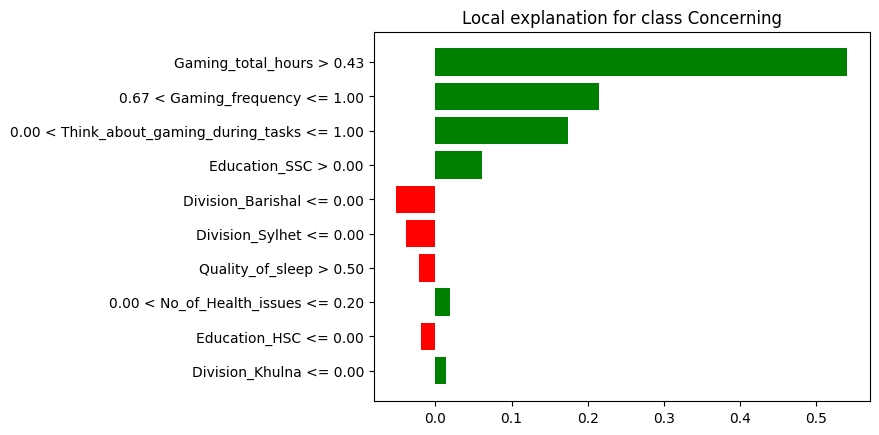

In [83]:
fig=exp.as_pyplot_figure()
fig.savefig('lime_report.jpg')
fig.savefig("Lime explanation DT", facecolor='white', bbox_inches="tight", pad_inches=0.3, transparent=True)

### XAI for Best AdaBoost classifier

In [84]:
print("\033[1mXAI for Default AdaBoost with n_estimators=50, learning_rate=1, algorithm=SAMME.R\033[1m\n")


ada=AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=102)
ada.fit(X_train, y_train)

exp = explainer.explain_instance(X_test.iloc[12], ada.predict_proba,num_features=7)
exp.show_in_notebook(show_table = True)
print(exp.as_list())

XAI for Default AdaBoost with n_estimators=50, learning_rate=1, algorithm=SAMME.R



[('Gaming_total_hours > 0.43', 0.6648399525340106), ('Gaming_frequency <= 0.67', -0.1927334906366132), ('0.00 < Think_about_gaming_during_tasks <= 1.00', 0.053067415211809355), ('Division_Khulna <= 0.00', 0.039657918596578495), ('Education_HSC <= 0.00', -0.03032321727107909), ('Division_Rajshahi <= 0.00', -0.02793215731803279), ('Education_Other <= 0.00', -0.02229919553328007)]


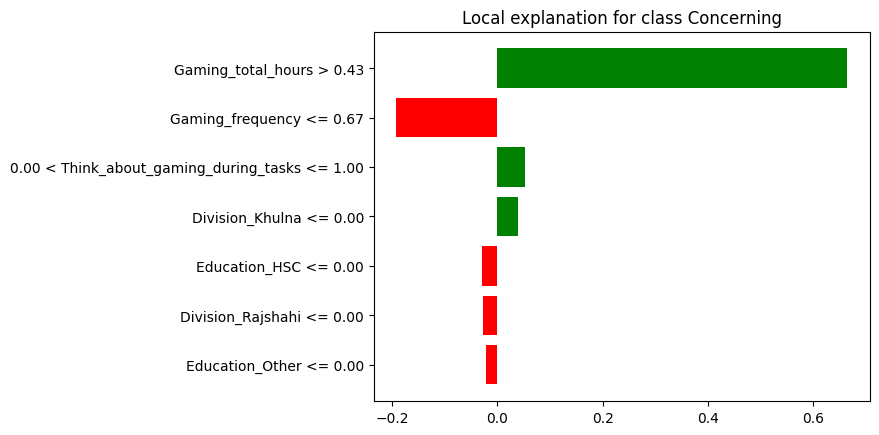

In [85]:
fig=exp.as_pyplot_figure()
fig.savefig("Lime explanation Ada Boost", facecolor='white', bbox_inches="tight", pad_inches=0.3, transparent=True)